# Read Dataset :


In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Q1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Q1
df.shape

(1338, 7)

In [5]:
#Q1
df.describe()


,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Q2
df['smoker'].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

-  Q3 data not balanced 

In [7]:
#    check the data for smokers 
smokers = df[df['smoker'] == "yes"]

# check the data for nun_smokers
non_smokers = df[df['smoker'] == "no"]

# count total in each
num_smokers = len(smokers)
num_non_smokers = len(non_smokers)

print(f" total smokers: {num_smokers}")
print(f"  total nun_smokers: {num_non_smokers}")


 total smokers: 274
  total nun_smokers: 1064


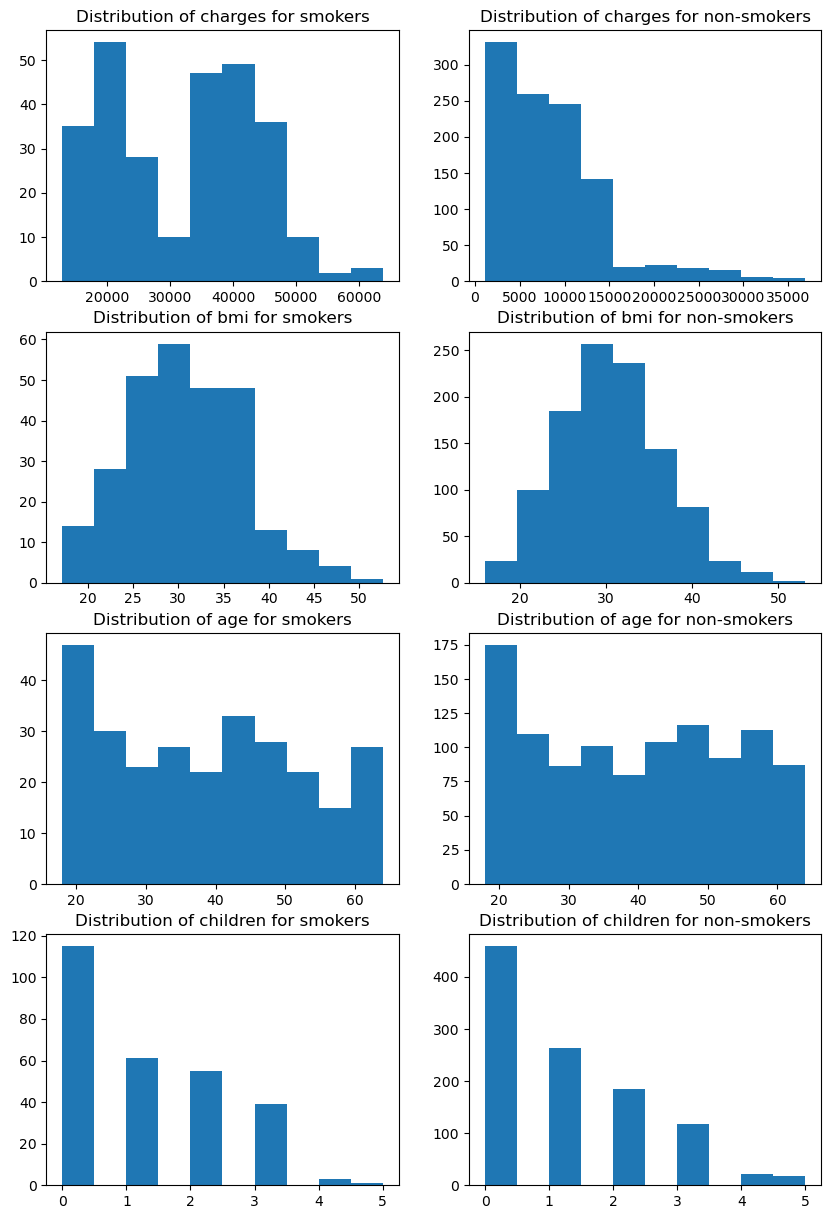

In [8]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 421
fig = plt.figure(figsize=(10,15))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

# Q4
- Distribution of fees for smokers is highest at 20,000, 40,000 and 35,000 to a lesser degree, and for non-smokers less than 5,000.
- The BMI distribution of smokers is much lower than that of non-smokers, especially after the age of twenty years.
- Most smokers are twenty years old, and most non-smokers are the same age. When comparing the two cases at the same age, we find that the percentage of non-smokers is much greater than that of smokers.
- Most smokers and non-smokers do not have children, so it is not a matter of age.

In [9]:

df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

# Q5
-  There is no difference in percentage between males and females.

# Q6

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

- yes there is 3 values null in bmi  

In [11]:
df=df.dropna()

# Q7

In [12]:
#  convert column "sex" to 0&1
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

#  convert column "smoker" to 0 & 1
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})

# check the head
df.head()


/var/folders/z5/hlw9vp8s5sncyq0k380c9gh40000gn/T/ipykernel_25396/916469756.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
/var/folders/z5/hlw9vp8s5sncyq0k380c9gh40000gn/T/ipykernel_25396/916469756.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [13]:
# using encoding 
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
label_encoder = LabelEncoder()

#  convert  "sex" columns 
df['sex'] = label_encoder.fit_transform(df['sex'])

# convert "smoker" columns
df['smoker'] = label_encoder.fit_transform(df['smoker'])

# check 
print(df.head())

   age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520


In [14]:
 
regions = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

#   replace "region" in regions  
df['region'] = df['region'].replace(regions)

# check 
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    0  33.770         1       0       1   1725.55230
2   28    0  33.000         3       0       1   4449.46200
3   33    0  22.705         0       0       2  21984.47061
4   32    0  28.880         0       0       2   3866.85520


/var/folders/z5/hlw9vp8s5sncyq0k380c9gh40000gn/T/ipykernel_25396/798500941.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['region'] = df['region'].replace(regions)


# Q8

In [15]:
df.max()

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [16]:
df / df.max()


,age,sex,bmi,children,smoker,region,charges
0,0.296875,1.0,0.525127,0.0,1.0,0.000000,0.264777
1,0.281250,0.0,0.635611,0.2,0.0,0.333333,0.027059
2,0.437500,0.0,0.621118,0.6,0.0,0.333333,0.069773
3,0.515625,0.0,0.427348,0.0,0.0,0.666667,0.344744
4,0.500000,0.0,0.543572,0.0,0.0,0.666667,0.060637
...,...,...,...,...,...,...,...
1333,0.781250,0.0,0.582910,0.6,0.0,0.666667,0.166230
1334,0.281250,1.0,0.600791,0.0,0.0,1.000000,0.034593
1335,0.281250,1.0,0.693582,0.0,0.0,0.333333,0.025558
1336,0.328125,1.0,0.485601,0.0,0.0,0.000000,0.031487


# Q8

In [18]:
from sklearn.model_selection import train_test_split

# splite data 
X = df.drop('smoker', axis=1)     
y = df['smoker']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 

# Q10

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  build Model
model = LogisticRegression()

#  trining the Model 
model.fit(X_train, y_train)

#   predactions   
y_pred = model.predict(X_test)

#  Evaluation the model 
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f" model accuracy: {accuracy}")

print(report)

 model accuracy: 0.951310861423221
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       202
           1       0.93      0.86      0.90        65

    accuracy                           0.95       267
   macro avg       0.94      0.92      0.93       267
weighted avg       0.95      0.95      0.95       267



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
!pip install imbalanced-learn


In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd

# افترض أن لديك X و y (الميزات والأهداف)

# 1. أولا، نتحقق من توزيع الفئات الأصلي
print("Original class distribution:", Counter(y))

# 2. Oversampling الفئة الأقل تمثيلاً بنسبة 0.5
oversampler = RandomOverSampler(sampling_strategy=0.5)  # هذه النسبة تعني أنك ستزيد الفئة الأقل تمثيلاً
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# 3. تحقق من توزيع الفئات بعد oversampling
print("After oversampling:", Counter(y_resampled))

# 4. Undersampling الفئة الأكثر تمثيلاً لتقليل عددها
undersampler = RandomUnderSampler(sampling_strategy='auto')  # 'auto' سيجعل الفئات متساوية
X_balanced, y_balanced = undersampler.fit_resample(X_resampled, y_resampled)

# 5. تحقق من توزيع الفئات بعد undersampling
print("After undersampling:", Counter(y_balanced))

# الآن لديك مجموعة بيانات متوازنة
# يمكنك متابعة تدريب نموذجك باستخدام X_balanced و y_balanced

Original class distribution: Counter({0: 1061, 1: 274})
After oversampling: Counter({0: 1061, 1: 530})
After undersampling: Counter({0: 530, 1: 530})


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Bulid the Model with the balnced data 
model_balanced = LogisticRegression()
model_balanced.fit(X_balanced, y_balanced)

# 2.      Predict balanced data 
y_pred_balanced = model_balanced.predict(X_test)

# 3. evaluate the model  
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
confusion_balanced = confusion_matrix(y_test, y_pred_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)

# 4.  
print("Results after balancing the dataset:")
print(f"accuracy : {accuracy_balanced}")
print(" confusion_balanced:")
print(confusion_balanced)
print(" report_balanced:")
print(report_balanced)


Results after balancing the dataset:
accuracy : 0.9775280898876404
 confusion_balanced:
[[196   6]
 [  0  65]]
 report_balanced:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       202
           1       0.92      1.00      0.96        65

    accuracy                           0.98       267
   macro avg       0.96      0.99      0.97       267
weighted avg       0.98      0.98      0.98       267



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
